# KMeans Clustering

* On place K centroids au hasard dans le dataset (ce sont les barycentres des futurs clusters)
* On affecte chaque point du dataset au centroid le plus proche
* On déplace chaque centroïd au milieu du cluster
* On recommence jusqu'à ce que les centroïds s'équilibres
* Puis on recommence avec d'autres centroids au hasard plusieurs fois. A la fin, on choisi la solution avec la plus petite variance

In [ ]:
pip install scikit-learn matplotlib

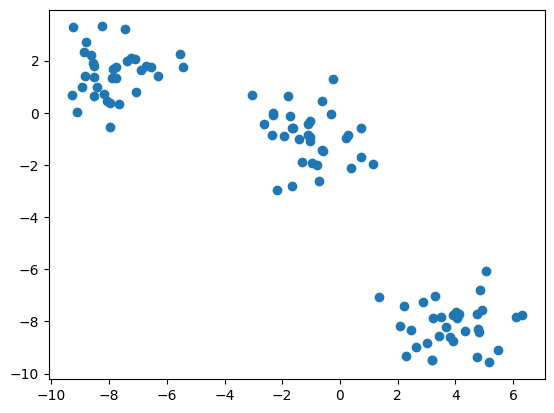

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3)

plt.scatter(X[:,0], X[:,1])


-194.99257765023873

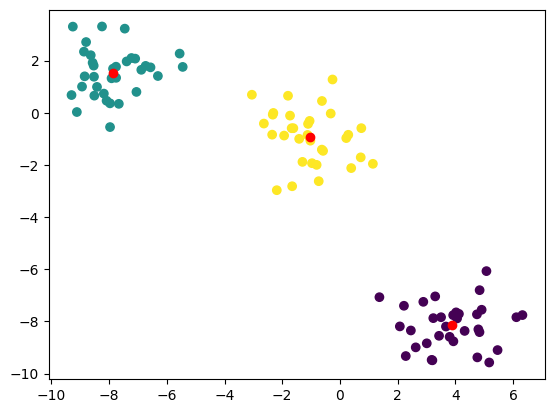

In [41]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.inertia_
model.score(X)

La technique Elbow Method permet de détecter un 'coude' dans l'évolution de l'évaluation d'un cluster

Text(0, 0.5, 'Coût du modèle (Inertia)')

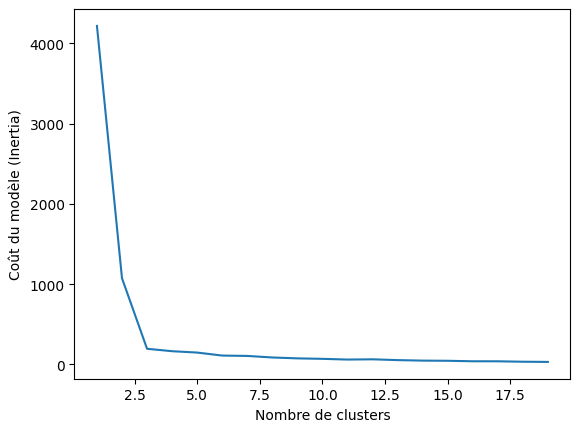

In [44]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
    
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Inertia)')

## Détection d'anomalies

Méthode Isolation Forest, c'est un arbre de décision

Une technique d'ensemble permet d'éxecuter plusieurs tests de split et d'éliminer un split très chanceux qui ne détecte pas bien l'anomalie

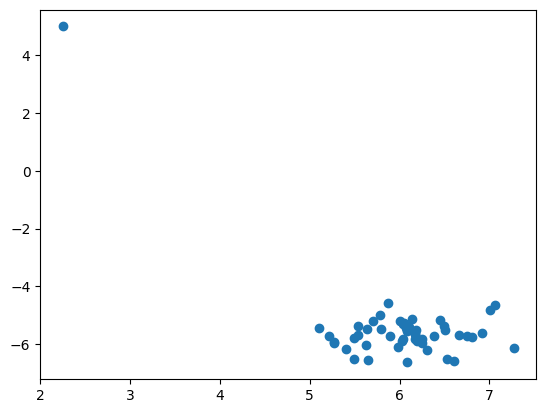

In [53]:
import numpy as np

X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.5)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:,1])

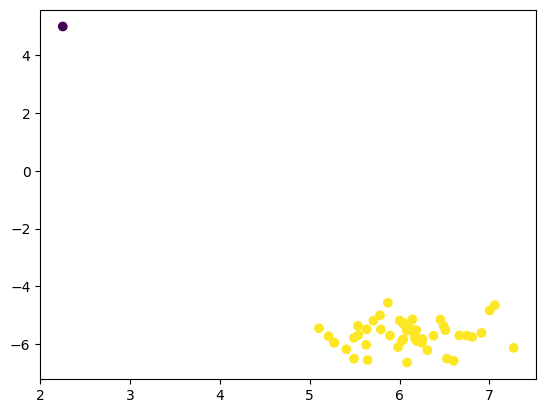

In [55]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

(1797, 64)


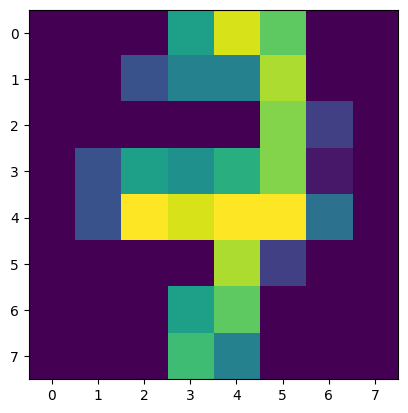

In [59]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)
plt.imshow(images[43])

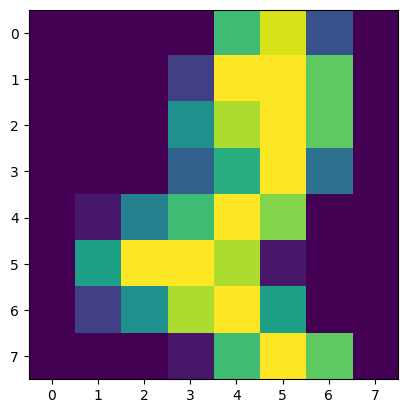

In [67]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
outliers = model.predict(X) == -1
plt.imshow(images[outliers][0])

Algorithme **Local Outlier Factors** permet de faire de la **Novelty Detection**

## PCA Réduction de Dimension

Réduire la complexité du dataset pour accélérer l'apprentissage et lutter contre le fléau de la dimension

PCA (Analyse en Composante Pincipale) : préserver un maximum de variance pour obtenir la projection la plus fidèle possible de nos données.

Pour déterminer le nombre composantes (n_components), deux cas:
- Pour visualiser les données dans un espace à 2 ou 3 dimensions, on choisi 2 ou 3
- Pour compresser les données: il faut réduire le nombre de composantes de manière à préserver 95-99% de variance

In [69]:
from sklearn.decomposition import PCA

X.shape

(1797, 64)

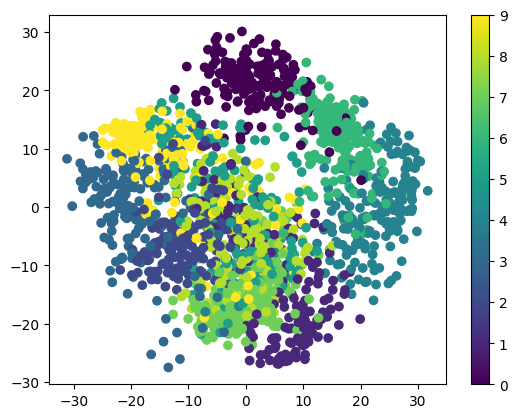

In [73]:

model = PCA(n_components=2)
X_reduced = model.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

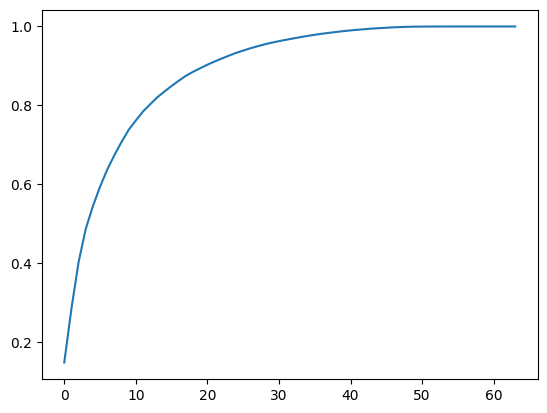

In [76]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [82]:
my_n_components = np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)
print(my_n_components)

40


In [84]:
model = PCA(n_components=my_n_components)
X_reduced = model.fit_transform(X)

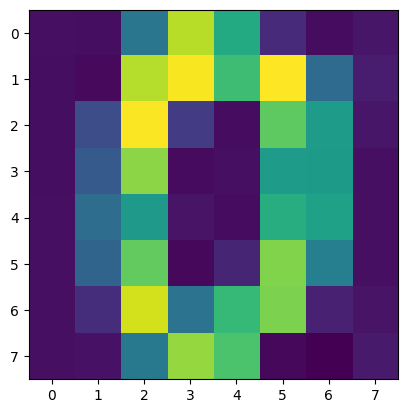

In [87]:
X_recovered = model.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape((8,8)))

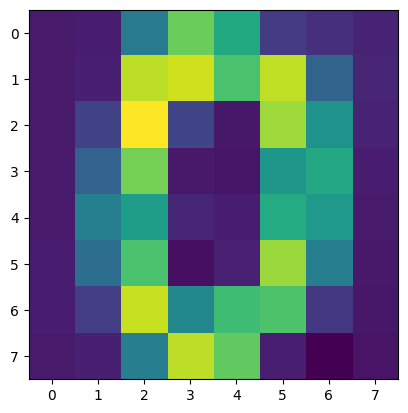

In [88]:
model = PCA(n_components=0.95)
X_reduced = model.fit_transform(X)
X_recovered = model.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape((8,8)))

In [89]:
model.n_components_

29